<a href="https://colab.research.google.com/github/namrathabt/namrathabt/blob/main/fakeaccountdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#Modules for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow import keras
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/final-v1.csv')
data.shape

(785, 13)

In [4]:
data.info

<bound method DataFrame.info of      edge_followed_by  edge_follow  username_length  username_has_number  \
0               0.001        0.257               13                    1   
1               0.000        0.958                9                    1   
2               0.000        0.253               12                    0   
3               0.000        0.977               10                    1   
4               0.000        0.321               11                    0   
..                ...          ...              ...                  ...   
780             0.000        0.020                9                    0   
781             0.000        0.081               18                    1   
782             0.000        0.115                9                    0   
783             0.000        0.049               12                    0   
784             0.000        0.096               11                    0   

     full_name_has_number  full_name_length  is_private

In [5]:
data.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [6]:
data.describe()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.0,785.000000,785.000000,785.000000,785.000000
mean,0.002223,0.401606,11.630573,0.644586,0.109554,6.129936,0.184713,0.361783,0.0,0.073885,0.001274,0.062420,0.881529
std,0.036105,0.293845,3.284329,0.478944,0.312532,6.943903,0.388312,0.480823,0.0,0.261751,0.035692,0.242072,0.323371
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.135000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.336000,11.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.623000,13.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,26.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [7]:
data['has_channel'].sum()

0

Dropping "has_channel" columns

In [8]:
data.drop('has_channel',axis=1,inplace=True)
data.shape

(785, 12)

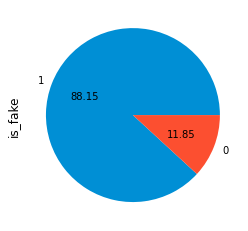

In [9]:
data['is_fake'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

Imbalanced dataset

Analysis on Binary columns

In [10]:
binary_cols0 = ['username_has_number']

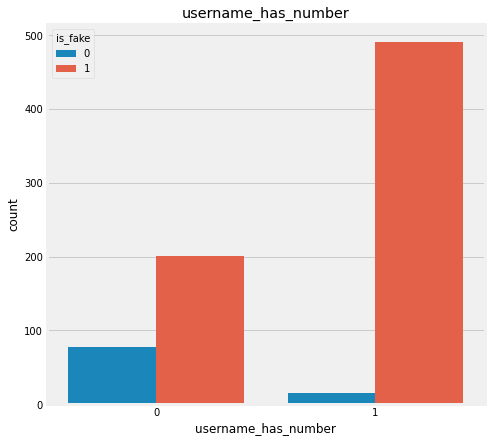

In [11]:
for b_col in binary_cols0:
    plt.figure(figsize=(7,7))
    sns.countplot(data=data[[b_col,'is_fake']],x=b_col,hue='is_fake')
    plt.title(b_col)
    plt.show()
    print('\n')

In [12]:
binary_cols1 = ['full_name_has_number']

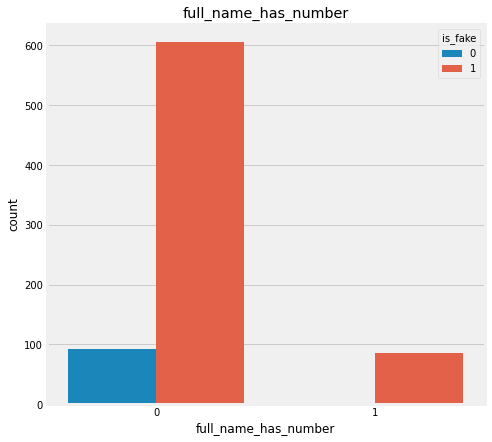

In [13]:
for b_col in binary_cols1:
    plt.figure(figsize=(7,7))
    sns.countplot(data=data[[b_col,'is_fake']],x=b_col,hue='is_fake')
    plt.title(b_col)
    plt.show()
    print('\n')

In [14]:
binary_cols2 = ['is_private']

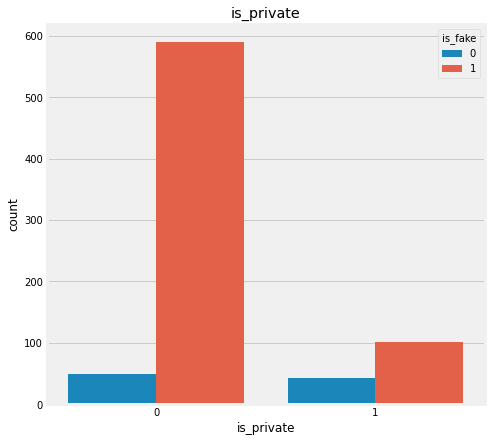

In [15]:
for b_col in binary_cols2:
    plt.figure(figsize=(7,7))
    sns.countplot(data=data[[b_col,'is_fake']],x=b_col,hue='is_fake')
    plt.title(b_col)
    plt.show()
    print('\n')

In [16]:
binary_cols3 = ['is_joined_recently']

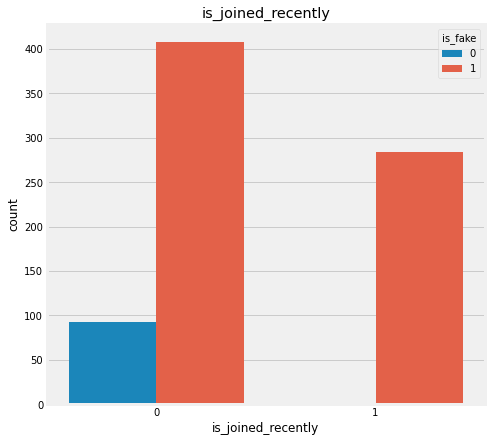

In [17]:
for b_col in binary_cols3:
    plt.figure(figsize=(7,7))
    sns.countplot(data=data[[b_col,'is_fake']],x=b_col,hue='is_fake')
    plt.title(b_col)
    plt.show()
    print('\n')

In [18]:
binary_cols4 = ['is_business_account']

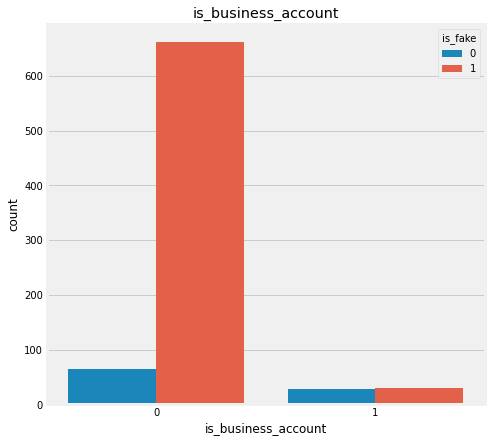

In [19]:
for b_col in binary_cols4:
    plt.figure(figsize=(7,7))
    sns.countplot(data=data[[b_col,'is_fake']],x=b_col,hue='is_fake')
    plt.title(b_col)
    plt.show()
    print('\n')

In [20]:
binary_cols5 = ['has_guides']

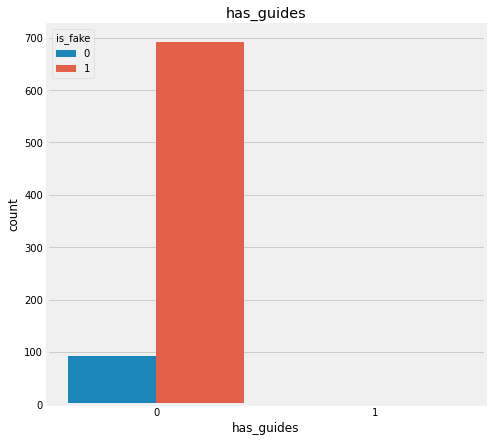

In [21]:
for b_col in binary_cols5:
    plt.figure(figsize=(7,7))
    sns.countplot(data=data[[b_col,'is_fake']],x=b_col,hue='is_fake')
    plt.title(b_col)
    plt.show()
    print('\n')

In [22]:
binary_cols6 = ['has_external_url']

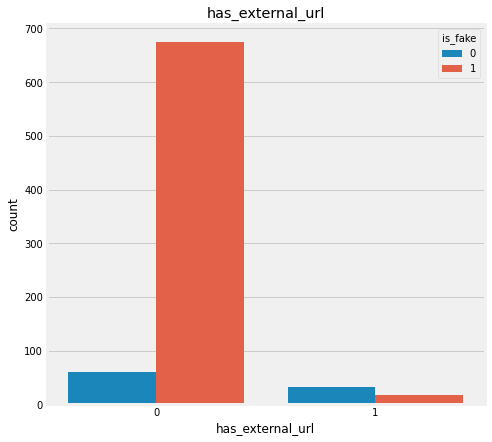

In [23]:
for b_col in binary_cols6:
    plt.figure(figsize=(7,7))
    sns.countplot(data=data[[b_col,'is_fake']],x=b_col,hue='is_fake')
    plt.title(b_col)
    plt.show()
    print('\n')

Analysis on the continious columns

In [24]:
other_cols = ['edge_followed_by','edge_follow','username_length','full_name_length']

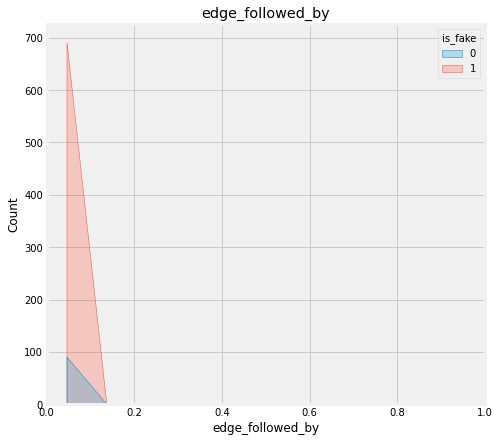

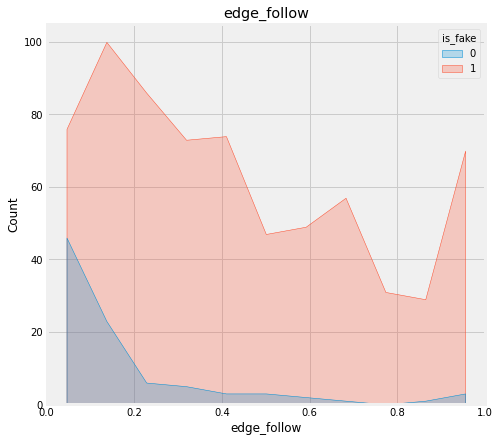

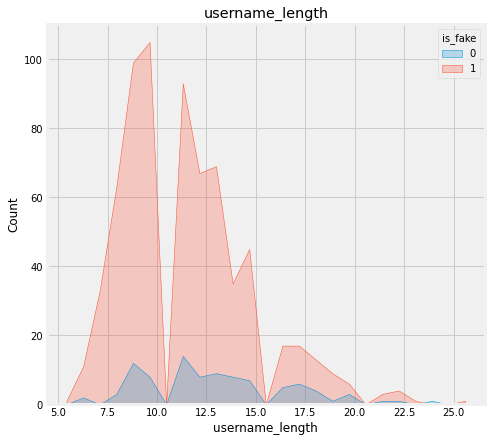

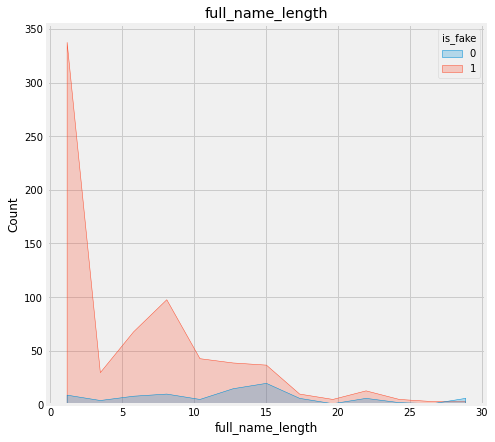

In [25]:
for col in other_cols:
    plt.figure(figsize=(7,7))
    sns.histplot(data=data[[col,'is_fake']],x=col,hue='is_fake',element='poly')
    plt.title(col)
    plt.show()
    print('\n')

Pair plotting other columns

<Figure size 504x504 with 0 Axes>

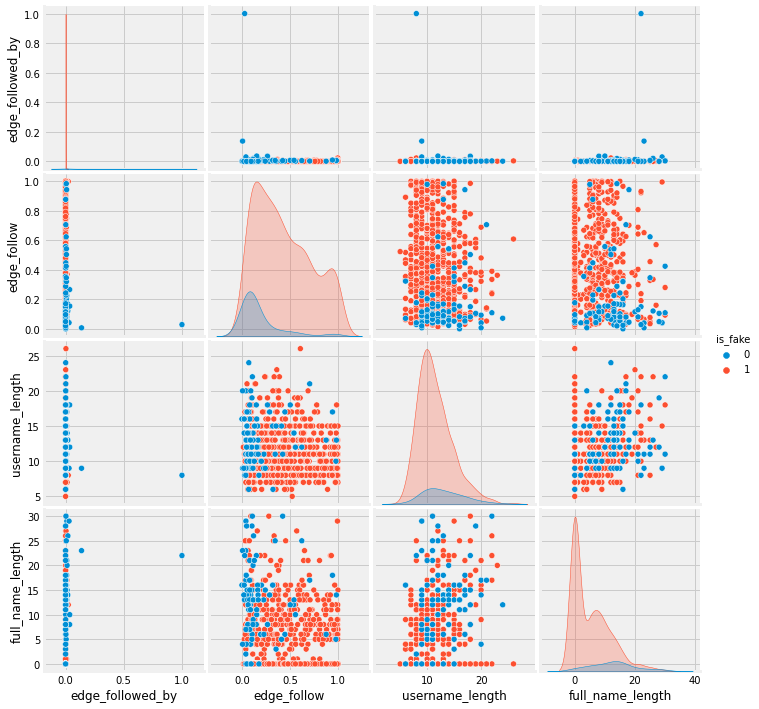

In [26]:
plt.figure(figsize=(7,7))
sns.pairplot(data[other_cols+['is_fake']],hue='is_fake')
plt.show()

In [27]:
cols_to_scale = ['username_length','full_name_length']

Feature scaling

In [28]:
data.describe

<bound method NDFrame.describe of      edge_followed_by  edge_follow  username_length  username_has_number  \
0               0.001        0.257               13                    1   
1               0.000        0.958                9                    1   
2               0.000        0.253               12                    0   
3               0.000        0.977               10                    1   
4               0.000        0.321               11                    0   
..                ...          ...              ...                  ...   
780             0.000        0.020                9                    0   
781             0.000        0.081               18                    1   
782             0.000        0.115                9                    0   
783             0.000        0.049               12                    0   
784             0.000        0.096               11                    0   

     full_name_has_number  full_name_length  is_priva

In [29]:
scale = MinMaxScaler()
scalled = scale.fit_transform(data[cols_to_scale])

data['username_length'],data['full_name_length'] = scalled[:,0],scalled[:,1]

In [30]:
data.head


<bound method NDFrame.head of      edge_followed_by  edge_follow  username_length  username_has_number  \
0               0.001        0.257         0.380952                    1   
1               0.000        0.958         0.190476                    1   
2               0.000        0.253         0.333333                    0   
3               0.000        0.977         0.238095                    1   
4               0.000        0.321         0.285714                    0   
..                ...          ...              ...                  ...   
780             0.000        0.020         0.190476                    0   
781             0.000        0.081         0.619048                    1   
782             0.000        0.115         0.190476                    0   
783             0.000        0.049         0.333333                    0   
784             0.000        0.096         0.285714                    0   

     full_name_has_number  full_name_length  is_private  

spliting x and y

In [31]:
X,Y = data.drop('is_fake',axis=1),data['is_fake']
X.shape,Y.shape

((785, 11), (785,))

over sampling using SMOTE

In [32]:
smote = SMOTE(sampling_strategy='minority')
X,Y = smote.fit_resample(X,Y)
X.shape,Y.shape

((1384, 11), (1384,))

VISULYZING A NEW DATA POINTS

In [33]:
xydf = pd.concat([X,Y],axis=1)
xydf.shape

(1384, 12)

<Figure size 504x504 with 0 Axes>

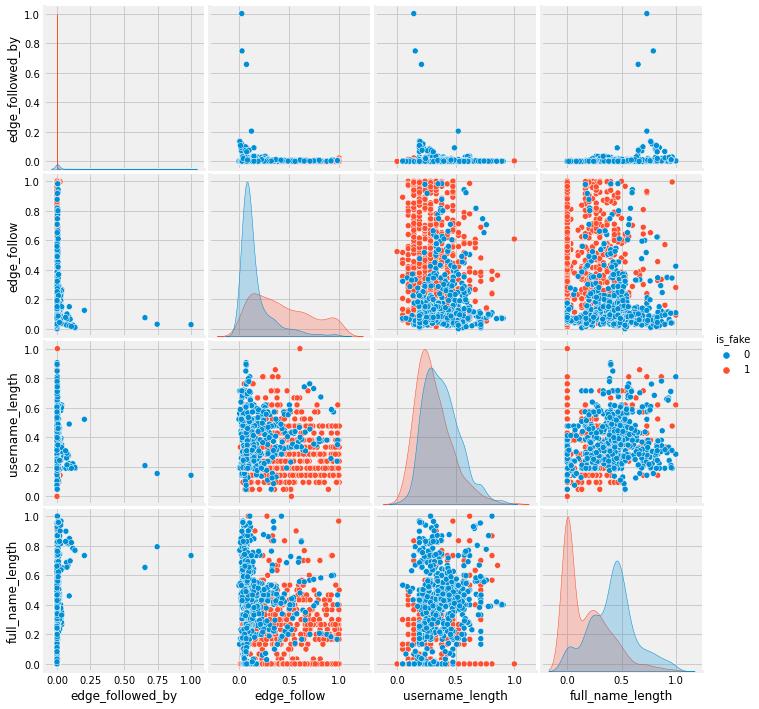

In [34]:
plt.figure(figsize=(7,7))
sns.pairplot(xydf[other_cols+['is_fake']],hue='is_fake')
plt.show()

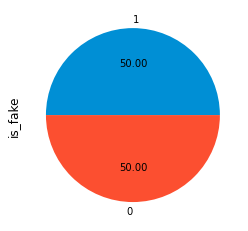

In [35]:
Y.value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

TRAINING AND TESTING DATA

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1038, 11), (346, 11), (1038,), (346,))

MODLE BULDING

In [37]:
model = keras.Sequential([
    keras.layers.Dense(11,input_shape=(11,),activation='relu'),
    keras.layers.Dense(2,activation='softmax'),
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
33/33 [==============================] - 1s 3ms/step - loss: 0.7411 - accuracy: 0.3256
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6638
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.8102
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.8343
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8420
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8622
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8738
Epoch 8/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.8940
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 0.2916 - accuracy: 0.9056
Epoch 10/100
33/33 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.9104
Epoch 11/

In [39]:
model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 3ms/step - loss: 0.2468 - accuracy: 0.9133


[0.24680720269680023, 0.913294792175293]

TEST DATA PRIDICTION

In [40]:
y_test_predict = [np.argmax(i) for i in model.predict(x_test)]
y_test_cm = confusion_matrix(y_test,y_test_predict)

11/11 [==============================] - 0s 3ms/step


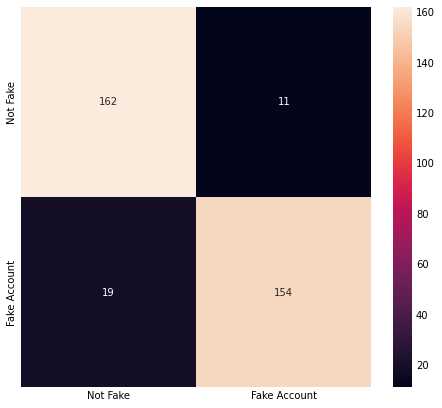

In [41]:
plt.figure(figsize=(7,7))
sns.heatmap(y_test_cm,annot=True,fmt='g',xticklabels=['Not Fake','Fake Account'],yticklabels=['Not Fake','Fake Account'])
plt.show()

In [42]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       173
           1       0.93      0.89      0.91       173

    accuracy                           0.91       346
   macro avg       0.91      0.91      0.91       346
weighted avg       0.91      0.91      0.91       346



Train Data Predictions

In [43]:
y_train_predict = [np.argmax(i) for i in model.predict(x_train)]
y_train_cm = confusion_matrix(y_train,y_train_predict)

33/33 [==============================] - 0s 2ms/step


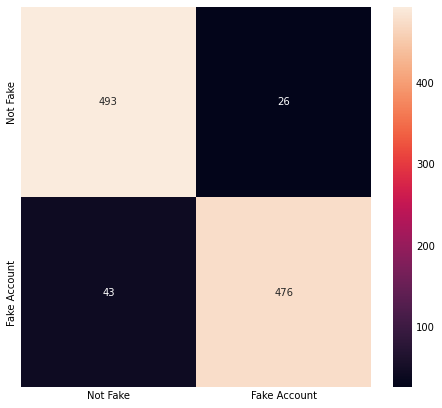

In [44]:
plt.figure(figsize=(7,7))
sns.heatmap(y_train_cm,annot=True,fmt='g',xticklabels=['Not Fake','Fake Account'],yticklabels=['Not Fake','Fake Account'])
plt.show()

In [45]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       519
           1       0.95      0.92      0.93       519

    accuracy                           0.93      1038
   macro avg       0.93      0.93      0.93      1038
weighted avg       0.93      0.93      0.93      1038

